In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import canary
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [44]:
# load data
rate, data = canary()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 500, 20000, rate)

In [45]:
data = data

In [46]:
figsize = (30,3)

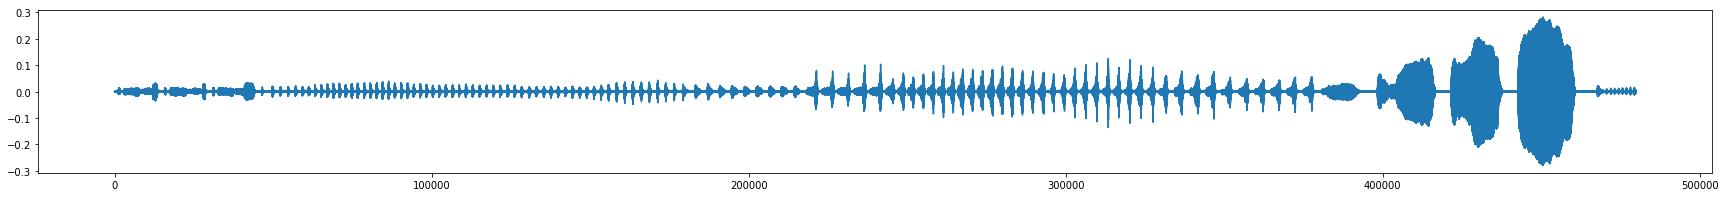

In [47]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

### Generate spectrogram
- view docstrings for more info

In [48]:
### parameters
n_fft=4096
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-80
silence_threshold = 0.01
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [500, 20000]
mask_thresh_std = 1.0
neighborhood_thresh=0.25
max_element_len_ms=2000
neighborhood_time_ms=5
neighborhood_freq_hz=2000
temporal_neighbor_merge_distance_ms= 0
overlapping_element_merge_thresh= 0.25
min_element_size_ms_hz = [5, 500]

In [49]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

(2049, 10001)

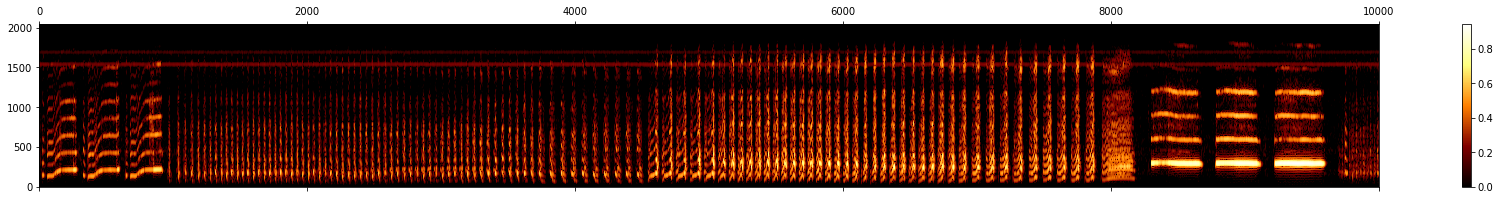

In [50]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### segment vocalization using continuity segmenation

In [51]:
from vocalseg.continuity_filtering import continuity_segmentation

longest silence 0.1429999999999989
longest vocalization 0.3819999999999997


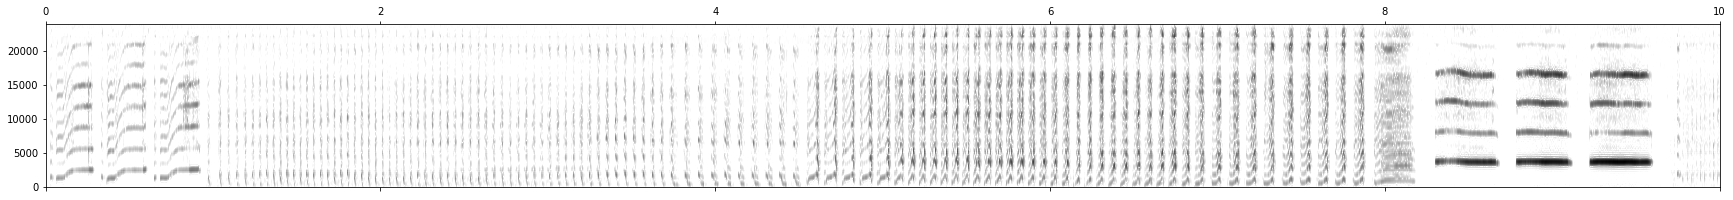

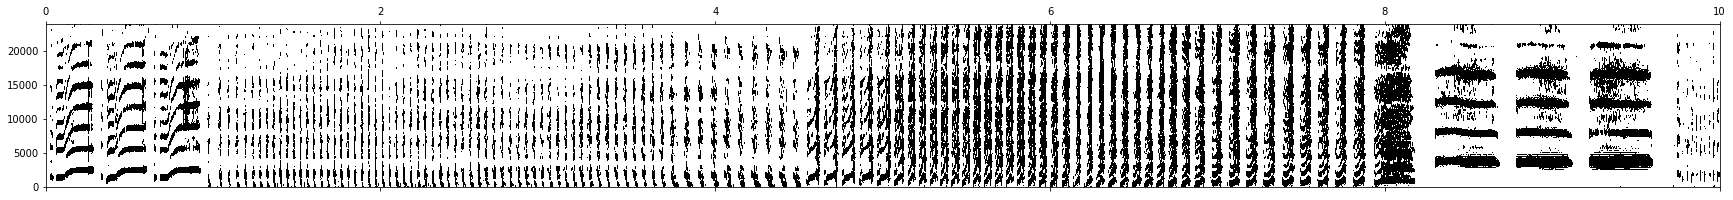

(170, 5)


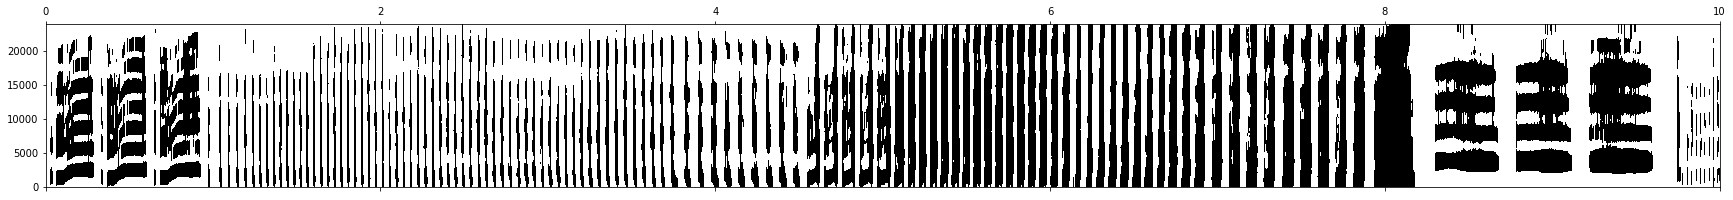

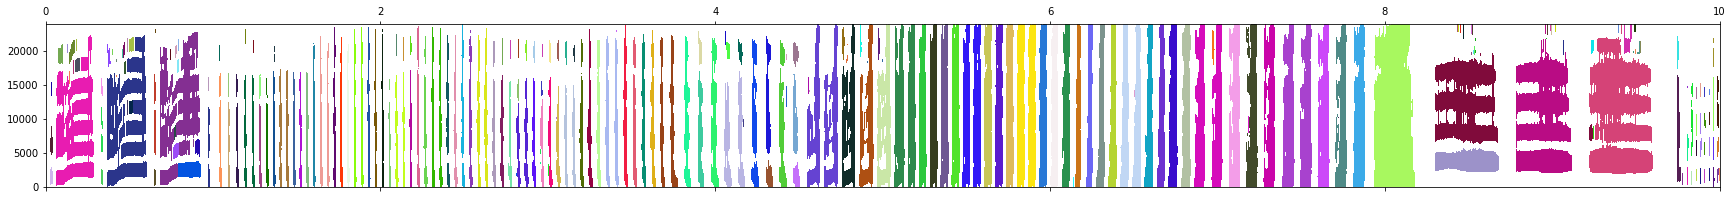

unique elements: 314


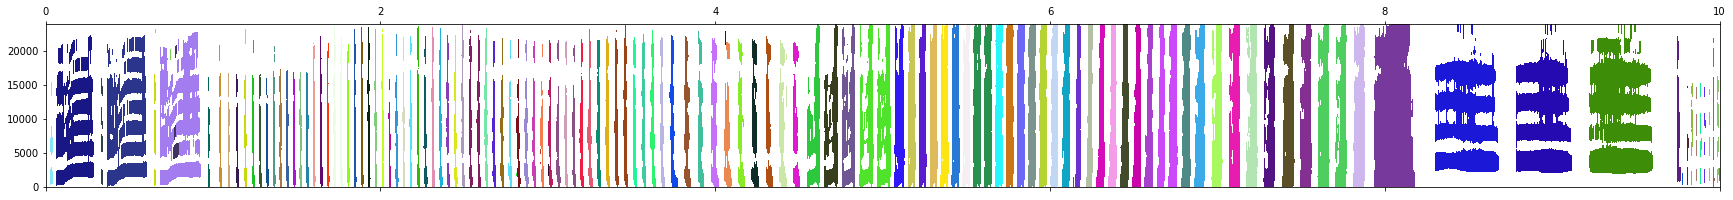

unique elements: 148
213


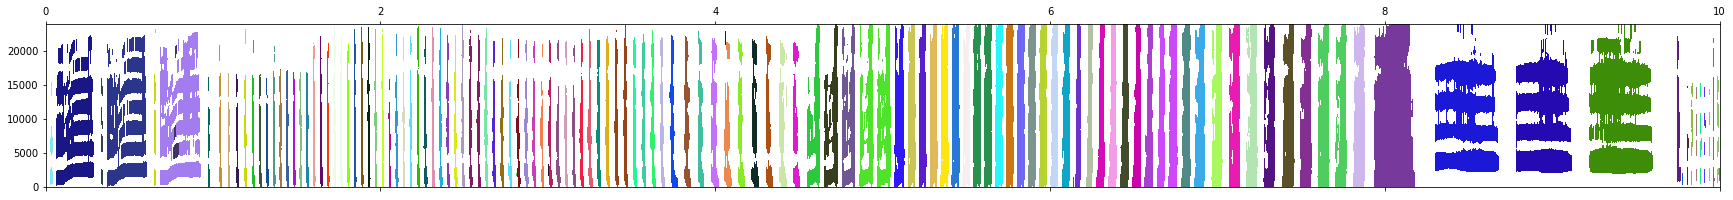

unique elements: 138
-80


In [52]:
results = continuity_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    verbose=True,
    spectral_range = spectral_range,
    mask_thresh_std = mask_thresh_std,
    figsize=figsize,
    neighborhood_thresh=neighborhood_thresh,
    max_element_len_ms = max_element_len_ms,
    neighborhood_time_ms=neighborhood_time_ms,
    neighborhood_freq_hz=neighborhood_freq_hz,
    temporal_neighbor_merge_distance_ms= temporal_neighbor_merge_distance_ms,
    overlapping_element_merge_thresh= overlapping_element_merge_thresh,
    min_element_size_ms_hz = min_element_size_ms_hz
)
print(results['min_level_db'])